#  The Objective of this Analysis to see how to use ANN as regression 

# Importing Libarary

In [1]:
import pandas as pd
import numpy as np
#from keras.layers import LSTM 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Evaluation
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense


# Data Loading

In [2]:
goal_df=pd.read_csv('C:/Users/rawan/Downloads/archive (2)/goalscorers.csv')
rank_df = pd.read_csv('C:/Users/rawan/Downloads/archive (2)/results.csv')
shootouts_df = pd.read_csv('C:/Users/rawan/Downloads/archive (2)/shootouts.csv')

# Data Exploration

In [3]:
goal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       10772 non-null  object 
 1   home_team  10772 non-null  object 
 2   away_team  10772 non-null  object 
 3   team       10772 non-null  object 
 4   scorer     10723 non-null  object 
 5   minute     10618 non-null  float64
 6   own_goal   10772 non-null  bool   
 7   penalty    10772 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 526.1+ KB


In [4]:
goal_df["date"] = pd.to_datetime(goal_df["date"])

In [5]:
goal_df.sort_values("date").head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
10,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,81.0,False,False


In [6]:
goal_df = goal_df[(goal_df["date"] >= "2018-8-1")].reset_index(drop=True)

In [7]:
goal_df.sort_values("date").tail()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
779,2022-02-05,Cameroon,Burkina Faso,Burkina Faso,André Onana,43.0,True,False
783,2022-02-05,Cameroon,Burkina Faso,Cameroon,Vincent Aboubakar,87.0,False,False
785,2022-06-01,Italy,Argentina,Argentina,Ángel Di María,45.0,False,False
784,2022-06-01,Italy,Argentina,Argentina,Lautaro Martínez,28.0,False,False
786,2022-06-01,Italy,Argentina,Argentina,Paulo Dybala,90.0,False,False


In [8]:
goal_df['penalty'].value_counts()

False    712
True      75
Name: penalty, dtype: int64

Text(0.5, 1.0, 'First 5 Cuontry if they have Pently ? ')

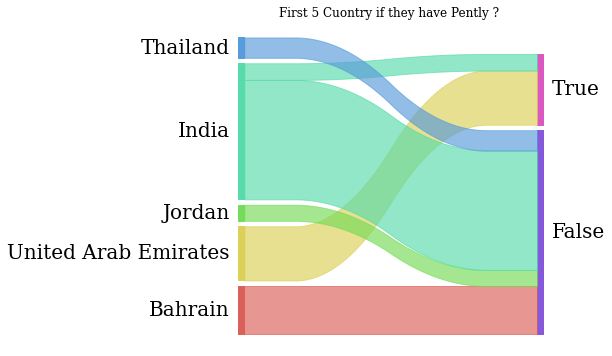

In [9]:
from pySankey.sankey import sankey
goal_df=goal_df.head(8)
sankey(
    left=goal_df["team"], right=goal_df['penalty'], 
    leftWeight= goal_df["minute"], rightWeight=goal_df["minute"], 
    aspect=20, fontsize=20
)
plt.title('First 5 Cuontry if they have Pently ? ')

In [10]:
rank_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [11]:
rank_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44202,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44203,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
44204,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True


In [12]:
shootouts_df["date"]

0      1967-08-22
1      1971-11-14
2      1972-05-07
3      1972-05-17
4      1972-05-19
          ...    
505    2022-09-23
506    2022-09-25
507    2022-11-16
508    2022-11-16
509    2022-11-19
Name: date, Length: 510, dtype: object

In [13]:
shootouts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       510 non-null    object
 1   home_team  510 non-null    object
 2   away_team  510 non-null    object
 3   winner     510 non-null    object
dtypes: object(4)
memory usage: 16.1+ KB


In [14]:
shootouts_df["date"] = pd.to_datetime(shootouts_df["date"])
shootouts_df = shootouts_df[(shootouts_df["date"] >= "2018-8-1")].reset_index(drop=True)

In [15]:
shootouts_df.head()

,date,home_team,away_team,winner
0,2019-01-20,Jordan,Vietnam,Vietnam
1,2019-01-21,Australia,Uzbekistan,Australia
2,2019-03-23,Oman,Singapore,Oman
3,2019-06-01,Lesotho,Uganda,Lesotho
4,2019-06-02,South Africa,Botswana,Botswana


<AxesSubplot:title={'center':' Top 10  Winners '}, xlabel='winner'>

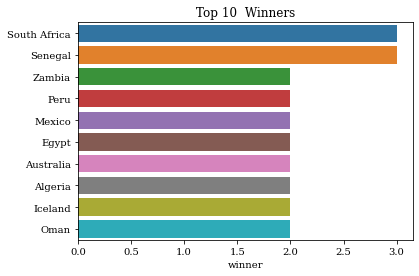

In [16]:
import seaborn as sns
top_teams=shootouts_df.winner.value_counts().sort_values(ascending=False).head(10)
top_teams
plt.title(' Top 10  Winners ')
sns.barplot(x=top_teams, y=top_teams.index)

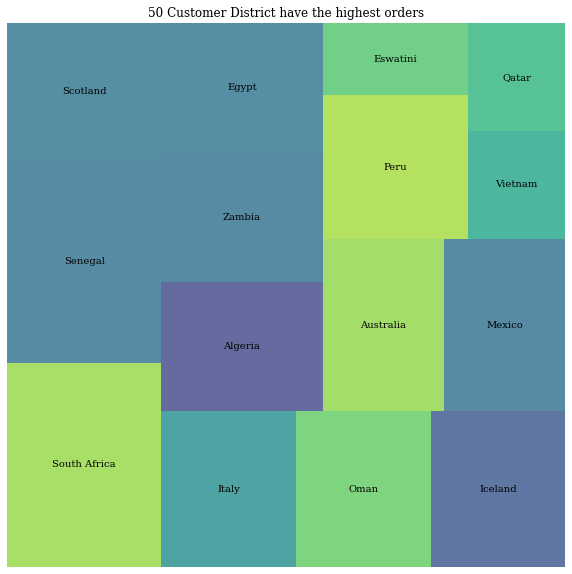

In [17]:
# libraries
import squarify    # pip install squarify (algorithm for treemap)





plt.subplots(figsize =(10, 10))
# plot it
squarify.plot(sizes=shootouts_df.winner.value_counts().head(15).values,data=shootouts_df, label=shootouts_df.winner.value_counts().keys(), alpha=.8 )
plt.axis('off')
plt.title('50 Customer District have the highest orders')
plt.show()

In [18]:
top_won_country =  shootouts_df['winner'].value_counts().head(10)
top_won_country

South Africa    3
Senegal         3
Scotland        2
Italy           2
Oman            2
Iceland         2
Algeria         2
Zambia          2
Egypt           2
Australia       2
Name: winner, dtype: int64

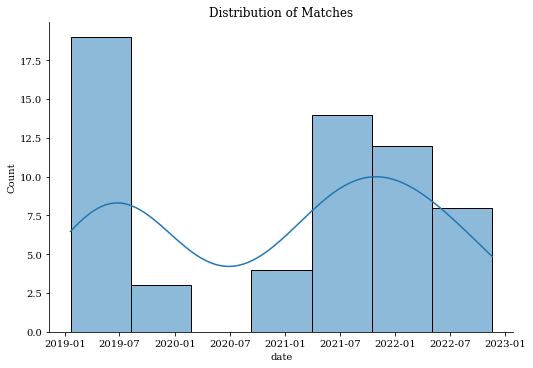

In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(shootouts_df.date,kde=True,height=5, aspect=1.5, palette='viridis')
plt.title('Distribution of Matches');

In [20]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = rank_df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [21]:
rank_df[["result", "home_team_points", "away_team_points"]] = results

In [22]:
rank_df["sg"] = rank_df["home_score"] - rank_df["away_score"]


In [23]:
rank_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home_team_points,away_team_points,sg
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,2,1,1,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,0,3,0,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,0,3,0,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,2,1,1,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,0,3,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True,2,1,1,NaN
44202,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True,2,1,1,NaN
44203,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True,2,1,1,NaN
44204,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True,2,1,1,NaN


In [24]:
# Keep only the "FIFA World Cup" class
rank_df=rank_df[rank_df['tournament'] == "FIFA World Cup"]
rank_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home_team_points,away_team_points,sg
1311,1930-07-13,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,1,0,3,-3.0
1312,1930-07-13,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True,0,3,0,3.0
1313,1930-07-14,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,True,1,0,3,-1.0
1314,1930-07-14,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,1,0,3,-2.0
1315,1930-07-15,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True,2,1,1,NaN
44202,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True,2,1,1,NaN
44203,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True,2,1,1,NaN
44204,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True,2,1,1,NaN


<AxesSubplot:>

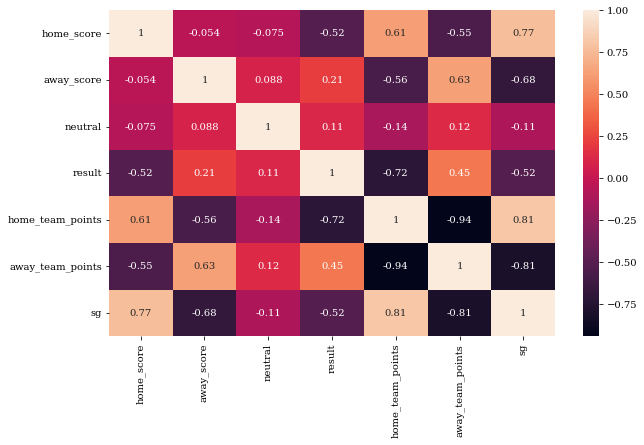

In [25]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(rank_df.corr(),annot=True)


In [26]:
# categorical_features
categorical_features = rank_df.describe(exclude="number").columns
categorical_features

Index(['date', 'home_team', 'away_team', 'tournament', 'city', 'country',
       'neutral'],
      dtype='object')

In [27]:
# Feature set 

categorical_features=rank_df[['home_team', 'away_team', 'city',
       'country']].describe(exclude="number").columns 
rank_df[categorical_features]

,home_team,away_team,city,country
1311,Belgium,United States,Montevideo,Uruguay
1312,France,Mexico,Montevideo,Uruguay
1313,Brazil,Yugoslavia,Montevideo,Uruguay
1314,Peru,Romania,Montevideo,Uruguay
1315,Argentina,France,Montevideo,Uruguay
...,...,...,...,...
44201,Canada,Morocco,Doha,Qatar
44202,Serbia,Switzerland,Doha,Qatar
44203,Cameroon,Brazil,Lusail,Qatar
44204,Ghana,Uruguay,Al Wakrah,Qatar


# Feature Enigeering if you want to use but here we dont need 

In [33]:
rank_df.fillna(0, inplace=True)

C:\Users\rawan\AppData\Local\Temp\ipykernel_35068\3621869273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df.fillna(0, inplace=True)


In [34]:
target=['home_score','away_score','sg']  # We can add to more score away_team_points but  idont want 
# feature set --> it cannot have the target 
X = rank_df[target]
# target set 
Y = rank_df['result']


In [35]:

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [36]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[ 1.02215643, -0.17264454,  0.86580826],
       [-1.00787302,  0.57945063, -1.12443484],
       [-0.33119654, -0.17264454, -0.12931329],
       ...,
       [ 0.34547995, -0.9247397 ,  0.86580826],
       [-0.33119654,  1.33154579, -1.12443484],
       [-1.00787302,  1.33154579, -1.62199562]])

# Bulid the model LR

In [38]:
# Create a linear regression model to compare with the NN  

lr = LinearRegression()
lr.fit(X_train, y_train)

preds_lin = lr.predict(X_test)
print("MAE : %.2f"%mean_absolute_error(y_true=y_test, y_pred=preds_lin))
print ("MSE: %.2f"%mean_squared_error(y_true=y_test, y_pred=preds_lin))
print("R2 %.2f" %lr.score(X_test,y_test)) 


MAE : 0.57
MSE: 0.46
R2 0.33


# Bulid the model NN with Regression 

In [42]:

learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [43]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 0.1875 - mean_squared_logarithmic_error: 0.1800 - val_loss: 0.0507 - val_mean_squared_logarithmic_error: 0.0561
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0389 - mean_squared_logarithmic_error: 0.0379 - val_loss: 0.0136 - val_mean_squared_logarithmic_error: 0.0154
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0129 - mean_squared_logarithmic_error: 0.0128 - val_loss: 0.0054 - val_mean_squared_logarithmic_error: 0.0061
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0045 - mean_squared_logarithmic_error: 0.0043 - val_loss: 0.0013 - val_mean_squared_logarithmic_error: 0.0013
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012 - val_loss: 5.7235e-04 - val_mean_squared_logarithmic_error: 6.0744e-04
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss:

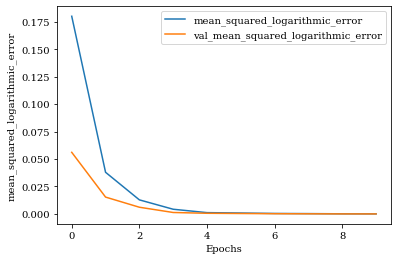

In [44]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')